<a href="https://colab.research.google.com/github/bac2qh/tmp/blob/master/IDW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This notebook will show how IDW is done using the KNN regressor from Scikit-learn module. 
## The first part of the notebook serves as a demo

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
# create a random DF with some pattern in elevation 

coordinate_x = np.random.rand(900)
coordinate_y = np.random.rand(900)
elevation = coordinate_x.copy()

data = pd.DataFrame({'X':coordinate_x, 'Y':coordinate_y, 'Elevation':elevation})

data['X'] = data['X']*10
data['Y'] = data['Y']*10
data['Elevation'] = data['Elevation']*100
data.head()

,X,Y,Elevation
0,1.041008,1.862184,10.410085
1,7.808422,8.022332,78.084224
2,0.503999,8.598156,5.039988
3,8.647123,0.430965,86.471229
4,5.736862,4.691123,57.368617


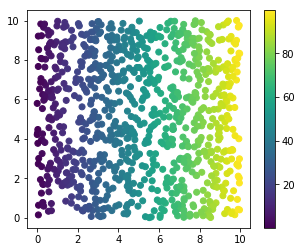

In [0]:
# plot the elevation 
fig, ax = plt.subplots(figsize=(5, 4))
ax = plt.scatter(data.X, data.Y, c=data.Elevation)
plt.colorbar(ax)
plt.show()

# fig, ax = plt.subplots(figsize=(20, 20))
# ax = plt.scatter(depth.X, depth.Y, c=depth.DEPTH)
# plt.colorbar(ax)
# plt.show()

# import matplotlib.pyplot as plt
# cm = plt.cm.get_cmap('RdYlBu')
# xy = range(20)
# z = xy
# sc = plt.scatter(xy, xy, c=z, vmin=0, vmax=20, s=35, cmap=cm)
# plt.colorbar(sc)
# plt.show()

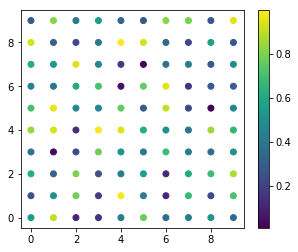

In [0]:
# create the grid for IDW interpolation later on
grid_x = []
grid_y = []
for i in range(10):
  for j in range(10):
    grid_x.append(i)
    grid_y.append(j)
    
grid = pd.DataFrame({'X':grid_x, 'Y':grid_y})

grid['IDW'] = np.random.rand(100)

# the current elevation pattern 
fig, ax = plt.subplots(figsize=(5, 4))
ax = plt.scatter(grid.X, grid.Y, c=grid.IDW)
plt.colorbar(ax)
plt.show()

In [0]:
# fit a KNN model for Inverse Distance Weighting 
# you can test different number with K
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5, weights='distance')

location_train = [(data.X[i], data.Y[i]) for i in range(len(data))]
neigh.fit(location_train, data.Elevation) 



KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance')

In [0]:
# make predictions 
location_test = [(grid.X[i], grid.Y[i]) for i in range(len(grid))]
grid.IDW = neigh.predict(location_test)

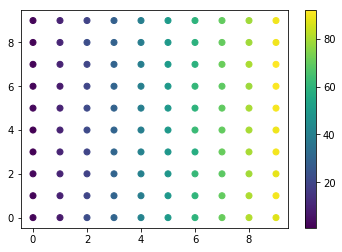

In [0]:
# the new elevation pattern 
fig, ax = plt.subplots()
ax = plt.scatter(grid.X, grid.Y, c=grid.IDW)
plt.colorbar(ax)
plt.show()

In [0]:
# import the depth file processed previously 
depth = pd.read_csv('./drive/My Drive/Colab Notebooks/depth.csv', index_col=0)
depth.head()

,Node,X,Y,DEPTH
0,1,2248148.95,7327379.83,0.0
1,2,2248159.85,7327369.53,0.0
2,3,2248138.05,7327390.12,0.0
3,4,2248170.74,7327359.23,0.0
4,5,2248181.64,7327348.94,0.0


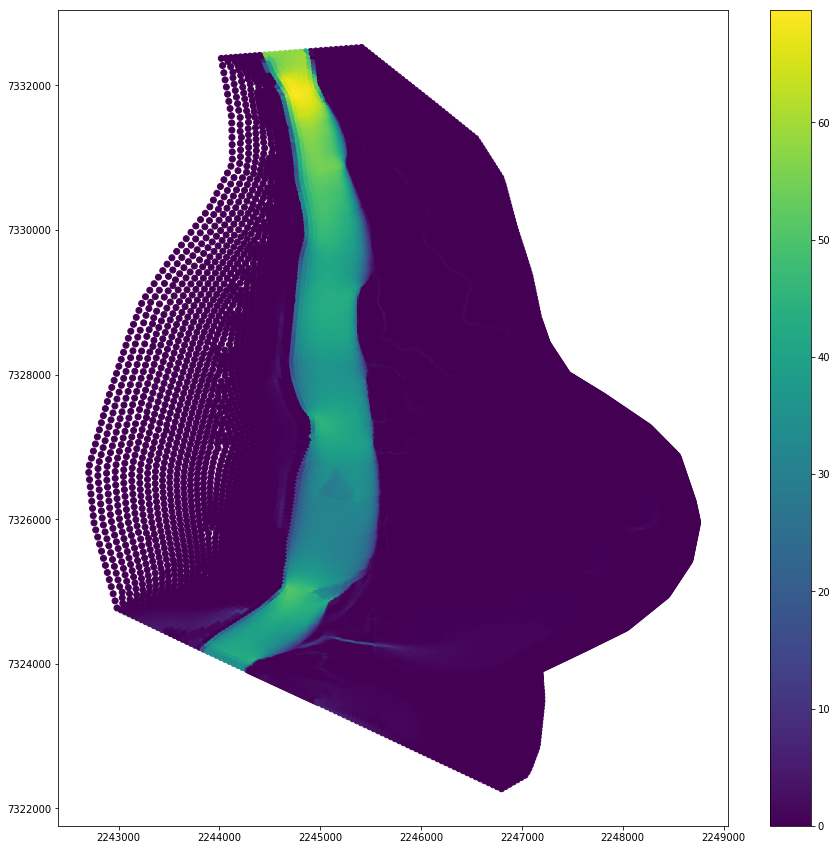

In [0]:
fig, ax = plt.subplots(figsize=(15, 15))
ax = plt.scatter(depth.X, depth.Y, c=depth.DEPTH)
plt.colorbar(ax)
plt.show()

In [0]:
# fit a KNN model for Inverse Distance Weighting 
location_train = [(depth.X[i], depth.Y[i]) for i in range(len(depth))]
depth_neigh = KNeighborsRegressor(n_neighbors=5, weights='distance')
depth_neigh.fit(location_train, depth.DEPTH) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance')

In [0]:
print(depth.X.max())
print(depth.Y.max())

2248741.88
7332526.0


In [0]:
# create the grid for interpolation 
"""
previously found range of x, y coordinates of the model output
2248741.88
2242703.76
7332526.0
7322272.0
"""
x_coor = np.arange(2242703.76, 2248741.88, 1.6479174451658463)
y_coor = np.arange(7322272.0, 7332526.0, 1.6479174451658463)
x = []
y = []
for i in x_coor:
  for j in y_coor:
    x.append(i)
    y.append(j)
    
new_grid = pd.DataFrame({'X':x, 'Y':y, 'Depth':0.1})
# location for prediction
location_pred = [(x[i], y[i]) for i in range(len(x))]

In [0]:
# predicting the elevation through KNN model fit with depth df
start_time = time.time()
new_grid.Depth = depth_neigh.predict(location_pred)
print("--- %s seconds ---" % (time.time() - start_time))

--- 53.64979958534241 seconds ---


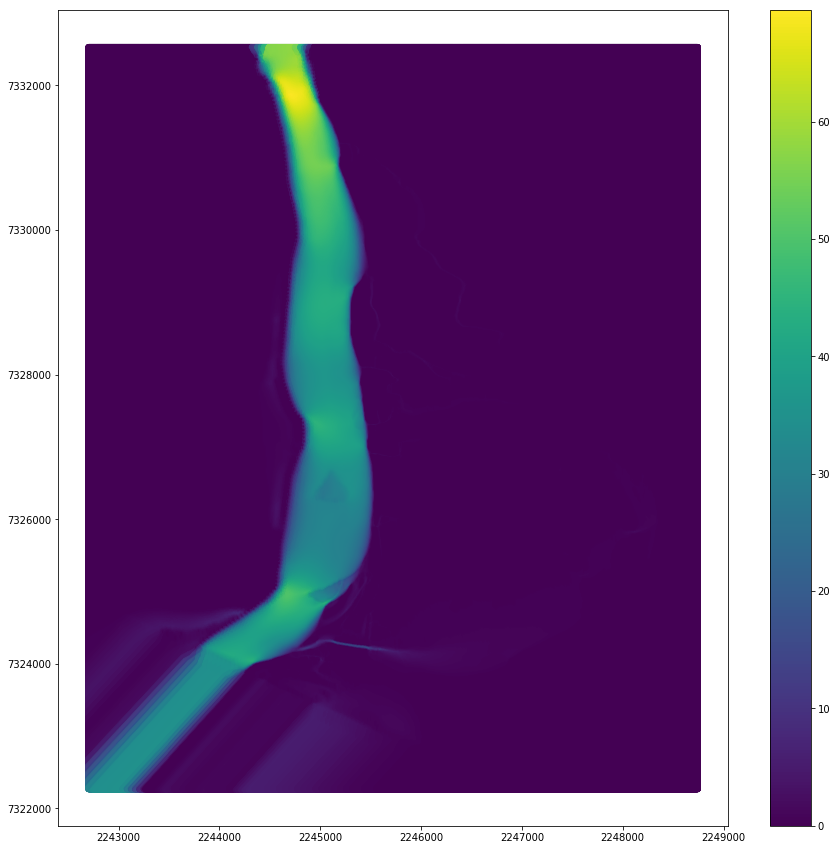

--- 828.2077035903931 seconds ---


In [0]:
# show the results
start_time = time.time()
fig, ax = plt.subplots(figsize=(15, 15))
ax = plt.scatter(new_grid.X, new_grid.Y, c=new_grid.Depth)
plt.colorbar(ax)
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))